In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  
import statsmodels.api as sm

In [2]:
#load the data
data = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [3]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
data.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [9]:
data.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Count missing values
count = data.isnull().sum()
print("Missing values per column:\n", count)

# Percentage of missing values
rows = data.shape[0]
print("\nPercentage of missing values:\n", (count / rows) * 100)


Missing values per column:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Percentage of missing values:
 Region                                      3.645833
 Date                                       3.645833
 Frequency                                  3.645833
 Estimated Unemployment Rate (%)            3.645833
 Estimated Employed                         3.645833
 Estimated Labour Participation Rate (%)    3.645833
Area                                        3.645833
dtype: float64


In [15]:
#drop the values which are null 
data = data.dropna()

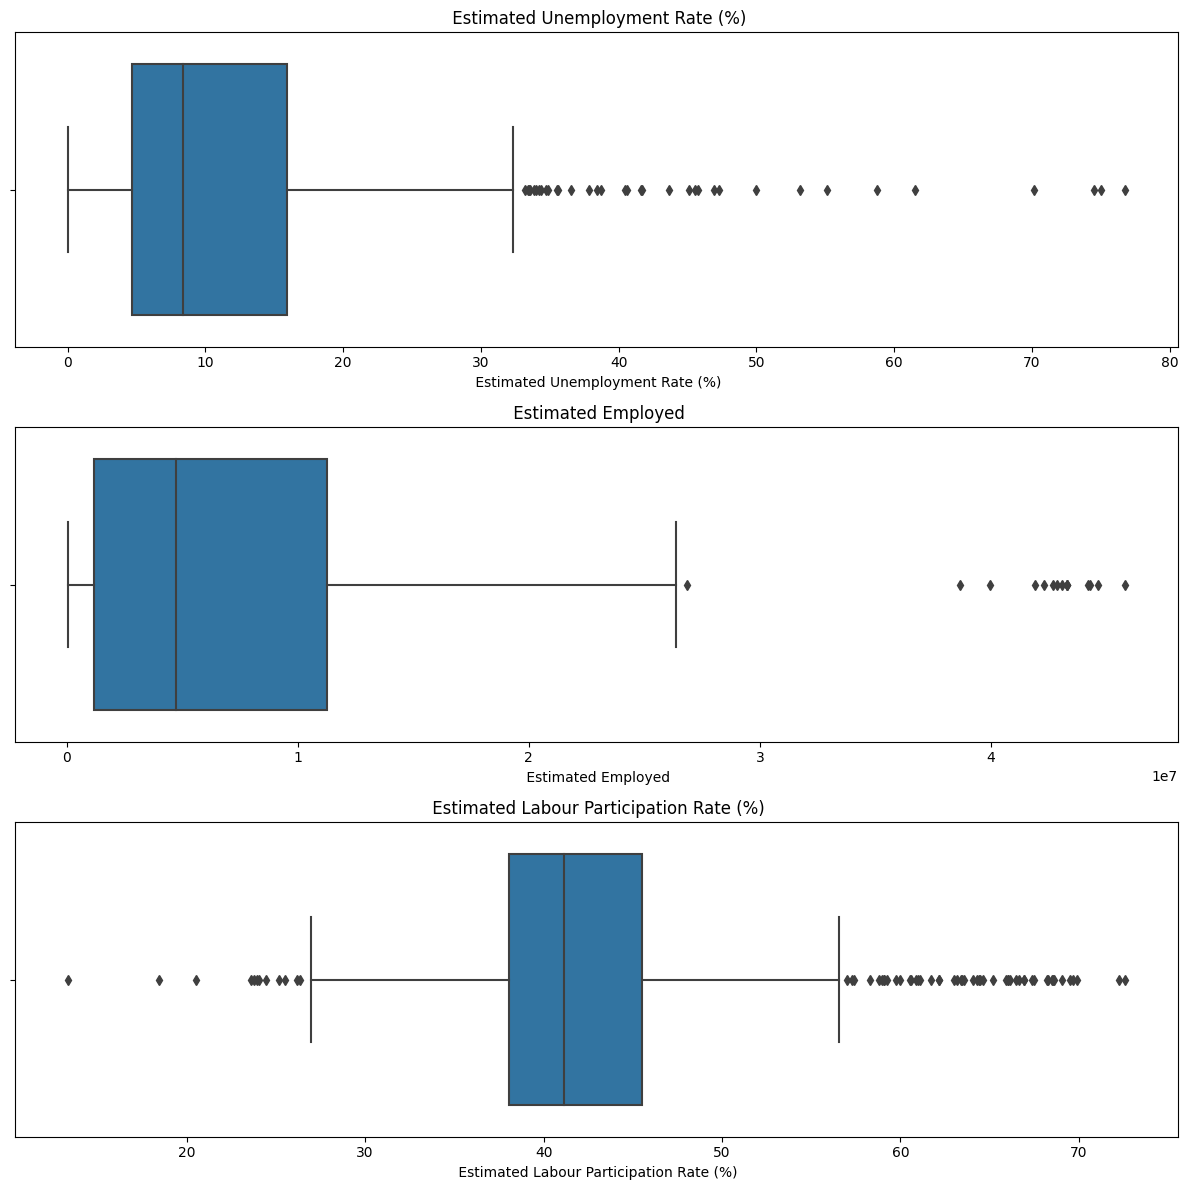

In [17]:
# now lets find the outliers
num_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, len(num_cols) * 4))  # size the figure
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


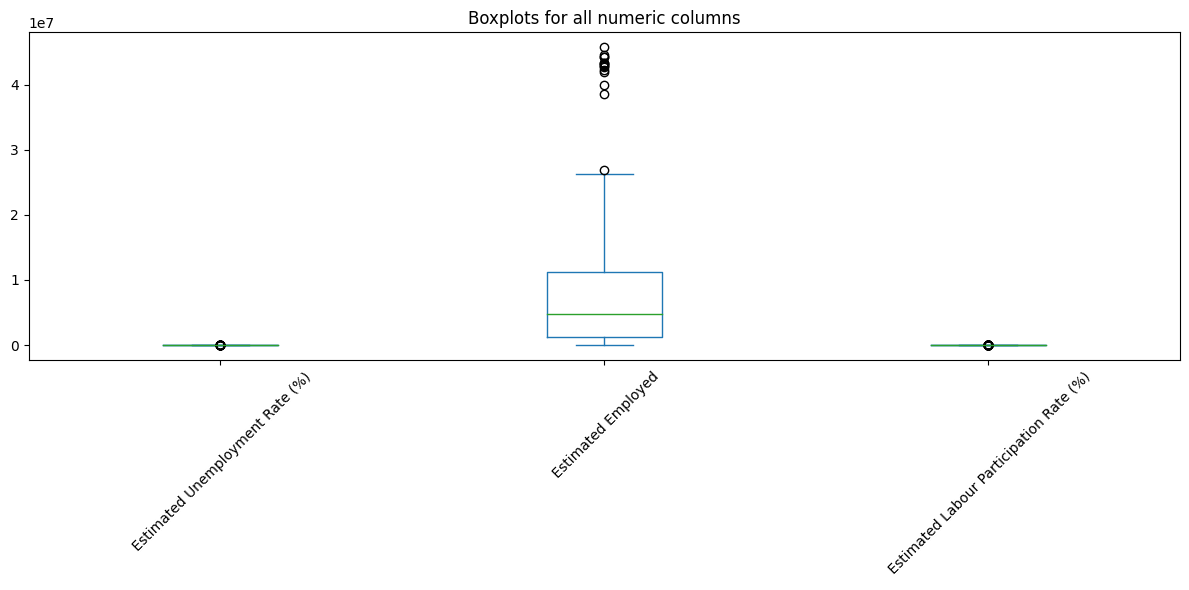

In [18]:
data.select_dtypes(include=np.number).plot(
    kind='box',
    subplots=False,
    figsize=(12, 6)
)
plt.xticks(rotation=45)
plt.title('Boxplots for all numeric columns')
plt.tight_layout()
plt.show()


In [20]:
# print the outliers of each col 
# Select numeric columns
num_cols = data.select_dtypes(include=np.number).columns

# Iterate columns and detect outliers
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    if not outliers.empty:
        print(f"\nColumn: {col}")
        print(f"Outliers:\n{outliers[[col]]}")
    else:
        print(f"\nColumn: {col} — No outliers detected")



Column:  Estimated Unemployment Rate (%)
Outliers:
     Estimated Unemployment Rate (%)
37                             45.09
38                             47.26
105                            41.61
106                            34.22
107                            35.57
144                            41.72
145                            55.10
158                            33.17
242                            74.51
255                            40.59
287                            53.19
288                            38.73
302                            34.01
315                            43.64
412                            58.77
413                            37.87
453                            45.78
492                            46.89
493                            38.46
507                            50.00
530                            61.48
531                            70.17
573                            40.49
627                            76.74
628                    

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


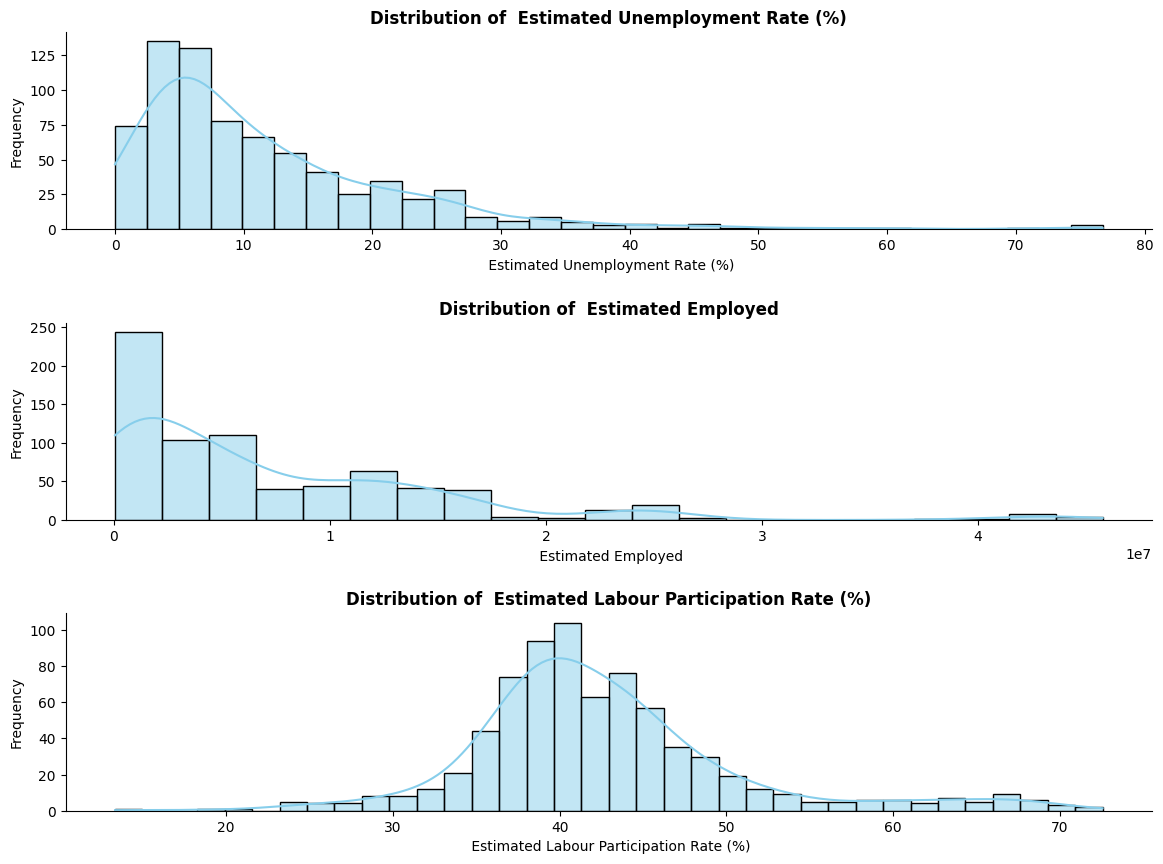

In [22]:
# now lets draw a histogram for data and later for modified data
num_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, len(num_cols) * 3))  # height scales with num of cols
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    sns.despine()
plt.tight_layout(pad=2.0)
plt.show()


In [23]:
num_cols = data.select_dtypes(include=np.number).columns

# Keep track of all outlier indices
outlier_indices = set()

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    outlier_indices.update(outliers.index)

# Drop all outliers at once
filtered_data = data.drop(index=outlier_indices)

print(f"Original shape: {data.shape}")
print(f"Filtered shape: {filtered_data.shape}")


Original shape: (740, 7)
Filtered shape: (635, 7)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


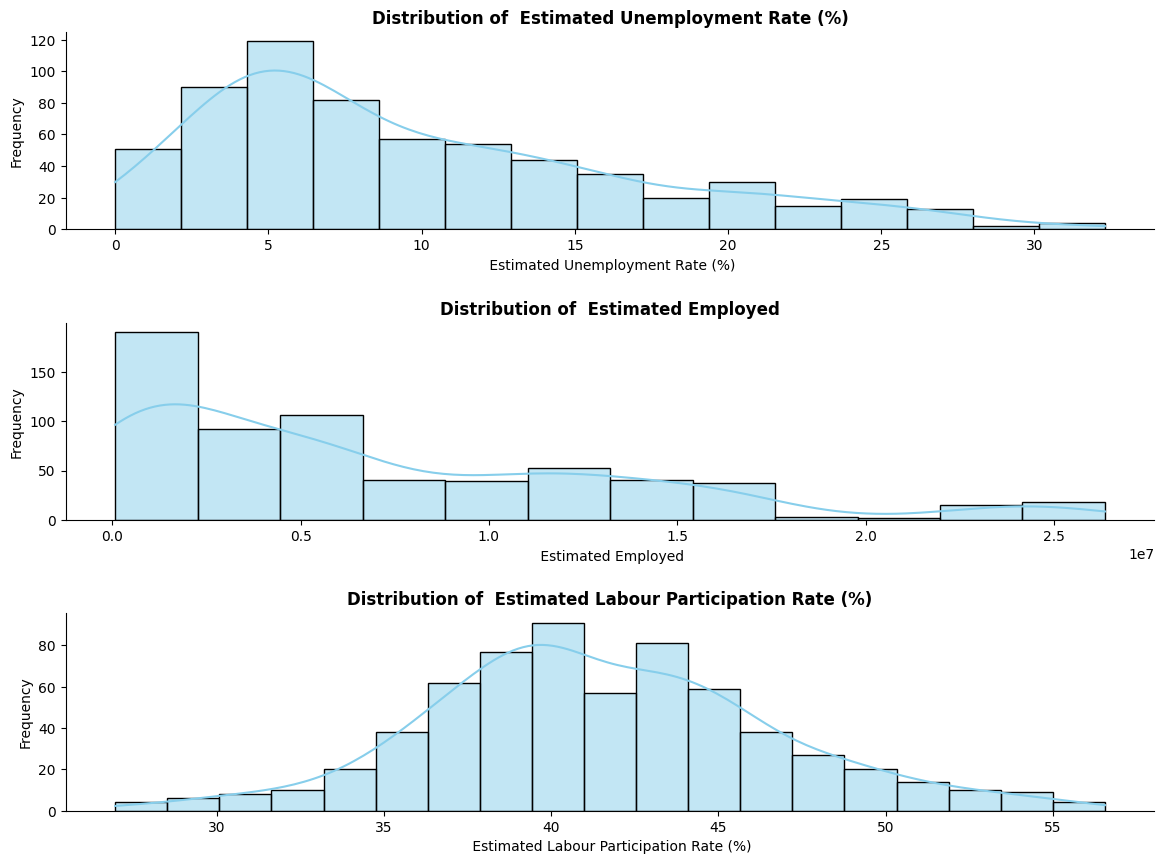

In [24]:
# now lets draw a histogram for data and later for modified data
num_cols = filtered_data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, len(num_cols) * 3))  # height scales with num of cols
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(filtered_data[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12, weight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    sns.despine()
plt.tight_layout(pad=2.0)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


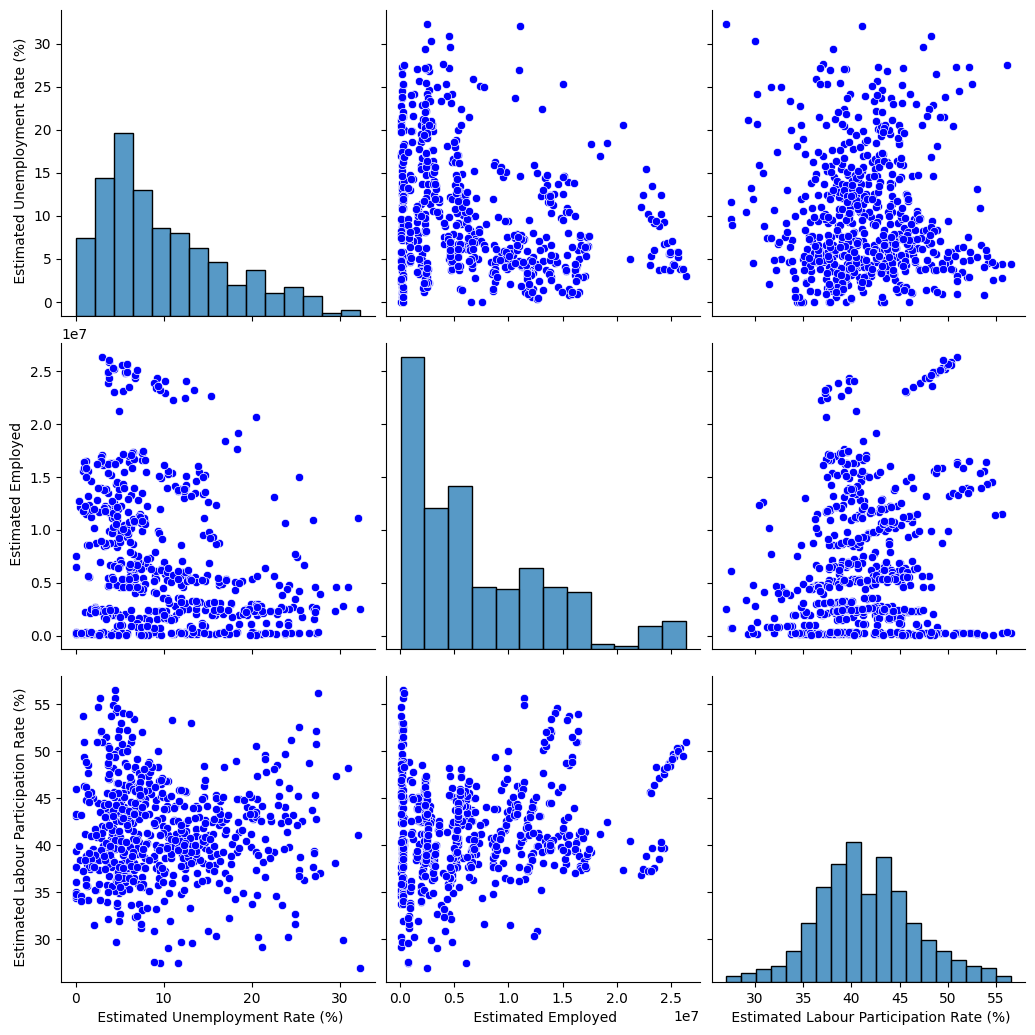

In [26]:
#lets understand the relationship between columns by pair plot
sns.pairplot(
    filtered_data,
    plot_kws={'color': 'blue'},
    height=3.5,     # Each subplot will be 3.5 inches wide and high
    aspect=1.0     # Aspect ratio, 1.0 keeps them square
)
plt.show()


## Conclusions
## 1. Distribution of Each Variable (Diagonal Histograms)
Estimated Unemployment Rate (%):

Right-skewed with most values concentrated below 15%, and a long tail reaching up to ~35%.

Estimated Employed:

Also right-skewed — most data is clustered below ~1.5e7, with some extreme higher values.

Estimated Labour Participation Rate (%):

Mostly normally distributed around 40–45% with few extreme low (~27%) or high (~55%) values.

## 2. Relationships Between the Variables (Scatter Plots)
🔵 Unemployment vs. Employed:
No strong linear relationship is obvious.

Suggests that as the estimated number of employed people increases, the unemployment rate doesn’t necessarily decrease proportionally — the points are quite scattered.

🔵 Unemployment vs. Labour Participation:
The data looks very scattered with slight negative tendency — higher labor participation may be associated with lower unemployment rates in some cases, but this is not very strong or obvious.

🔵 Employed vs. Labour Participation:
Seems to show some positive relation — higher estimated employed generally correlates with slightly higher labor participation rate.



In [32]:
# correlation between the variables
print(f"\n{data.head()}")
data.dtypes



           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Convert categorical columns to numeric codes
cat_cols = ['Region', 'Frequency', 'Area']
for col in cat_cols:
    data[col] = data[col].astype('category').cat.codes

# 2️⃣ Compute the correlation matrix
corr_matrix = data.corr()

# 3️⃣ Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,         # show the numeric correlations
    cmap='coolwarm',    # color map
    fmt='.2f',          # format numbers to 2 decimals
    linewidths=0.5,     # gridlines
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix of All Variables', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Compute the covariance matrix
cov_matrix = data.cov()

# Plot the covariance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_matrix, 
    annot=True,        # show numeric values
    cmap='viridis',    # different color map for covariance
    fmt='.2e',         # scientific notation to fit larger/smaller numbers
    linewidths=0.5,    # gridlines
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Covariance Matrix of All Variables', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#statsictical tests to find the distirbution
#Shapiro-Wilk Test for each numeric column:
from scipy import stats

num_cols = data.select_dtypes(include=np.number).columns

print("=== Shapiro-Wilk Normality Test ===")
for col in num_cols:
    stat, p = stats.shapiro(data[col])
    print(f"{col}: W={stat:.3f}, p-value={p:.4f} --> {'Normal' if p>0.05 else 'Not normal'}")


In [ ]:
# Visual Check with Q-Q Plots, Quantile-Quantile plots help you visually assess if the data follow a straight line (normal distribution).
import matplotlib.pyplot as plt
import scipy.stats as stats

num_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, len(num_cols)*4))  # height scales with num of columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
# Anderson–Darling Test (More sensitive than Shapiro)
from scipy import stats
num_cols = data.select_dtypes(include=np.number).columns
print("=== Anderson-Darling Test ===")
for col in num_cols:
    result = stats.anderson(data[col], dist='norm')
    stat = result.statistic
    critical_values = result.critical_values
    sig_levels = result.significance_level
    print(f"{col}: A={stat:.3f}, Critical Values={critical_values}, Significance={sig_levels}")


In [ ]:
# Compute Variance and Standard Deviation per column
num_cols = data.select_dtypes(include=np.number).columns

# Compute statistics
variances = data[num_cols].var()
stds = data[num_cols].std()

# Save them into a DataFrame
spread_df = pd.DataFrame({
    'Variance': variances,
    'Standard Deviation': stds
})

print(spread_df)


In [ ]:
# Plot column-wise Variance
plt.figure(figsize=(10, 6))
sns.barplot(x=variances.index, y=variances.values, color='teal')
plt.title('Column-wise Variance', weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()


In [ ]:
# Plot column-wise Standard Deviation
plt.figure(figsize=(10, 6))
sns.barplot(x=stds.index, y=stds.values, color='orange')
plt.title('Column-wise Standard Deviation', weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Standard Deviation')
plt.tight_layout()
plt.show()


In [ ]:
#  Grouping and Summarizing by Important Columns
# Group by region
region_summary = data.groupby('Region').agg(
    Mean_Unemployment=('Estimated Unemployment Rate (%)', 'mean'),
    Mean_Employed=('Estimated Employed', 'mean'),
    Mean_Labour_Participation=('Estimated Labour Participation Rate (%)', 'mean'),
    Total_Employed=('Estimated Employed', 'sum'),
    Min_Unemployment=('Estimated Unemployment Rate (%)', 'min'),
    Max_Unemployment=('Estimated Unemployment Rate (%)', 'max')
).reset_index()

print(region_summary)

region_area_summary = data.groupby(['Region', 'Area']).agg(
    Mean_Unemployment=('Estimated Unemployment Rate (%)', 'mean'),
    Mean_Employed=('Estimated Employed', 'mean')
).reset_index()

print(region_area_summary)


In [ ]:
# Time-Series Exploration
# Identify trends over time:
# Use sns.lineplot(x='Date', y='SomeVariable', data=data) to visualize temporal trends.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.set_index('Date')['Estimated Unemployment Rate (%)'], model='additive', period=12)
result.plot()
